In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [3]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


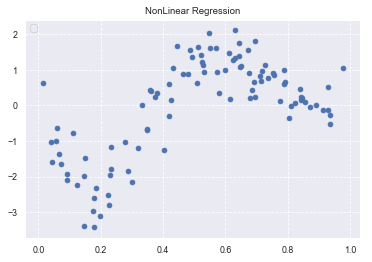

In [4]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.39033861861987657


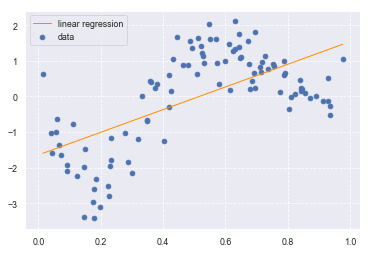

In [5]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

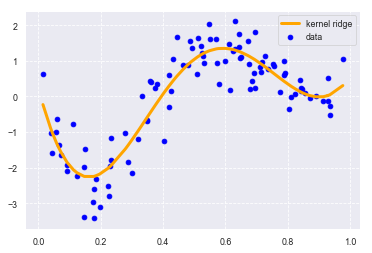

In [6]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.8347491532398071


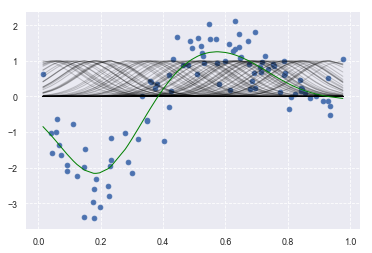

In [7]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

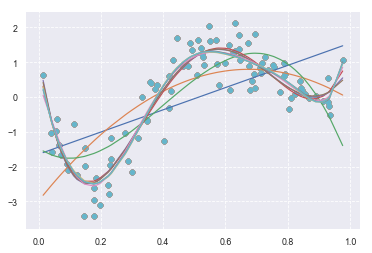

In [9]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

-2.220446049250313e-16


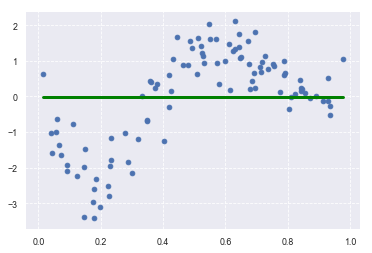

In [10]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

C:\Users\takam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\takam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\takam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


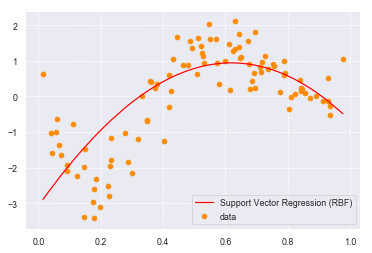

In [11]:
from sklearn import cross_validation, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

In [13]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

import os
model_dir = './out/checkpoints/'
if os.path.exists(model_dir) == False:os.mkdir(model_dir)
cb_cp = ModelCheckpoint('./out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='./out/tensorBoard', histogram_freq=0)

# relu_reg_model 関数を定義 
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Using TensorFlow backend.


In [14]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

#history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))
history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 90 samples, validate on 10 samples
Epoch 1/100
90/90 [==============================] - 3s 32ms/step - loss: 1.7073 - val_loss: 1.5103

Epoch 00001: saving model to ./out/checkpoints/weights.01-1.51.hdf5
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 0.9202 - val_loss: 0.4852

Epoch 00002: saving model to ./out/checkpoints/weights.02-0.49.hdf5
Epoch 3/100
90/90 [==============================] - 1s 11ms/step - loss: 0.8716 - val_loss: 1.0915

Epoch 00003: saving model to ./out/checkpoints/weights.03-1.09.hdf5
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 0.8330 - val_loss: 1.1985

Epoch 00004: saving model to ./out/checkpoints/weights.04-1.20.hdf5
Epoch 5/100
90/90 [==============================] - 1s 10ms/step - loss: 0.6875 - val_loss: 0.2548

Epoch 00005: saving model to ./out/checkpoints/weights.05-0

Epoch 46/100
90/90 [==============================] - 1s 10ms/step - loss: 0.4425 - val_loss: 0.7904

Epoch 00046: saving model to ./out/checkpoints/weights.46-0.79.hdf5
Epoch 47/100
90/90 [==============================] - 1s 10ms/step - loss: 0.4234 - val_loss: 0.7312

Epoch 00047: saving model to ./out/checkpoints/weights.47-0.73.hdf5
Epoch 48/100
90/90 [==============================] - 1s 12ms/step - loss: 0.3221 - val_loss: 0.3730

Epoch 00048: saving model to ./out/checkpoints/weights.48-0.37.hdf5
Epoch 49/100
90/90 [==============================] - 1s 11ms/step - loss: 0.3903 - val_loss: 0.8513

Epoch 00049: saving model to ./out/checkpoints/weights.49-0.85.hdf5
Epoch 50/100
90/90 [==============================] - 1s 10ms/step - loss: 0.4715 - val_loss: 0.6655

Epoch 00050: saving model to ./out/checkpoints/weights.50-0.67.hdf5
Epoch 51/100
90/90 [==============================] - 1s 10ms/step - loss: 0.4955 - val_loss: 0.4216

Epoch 00051: saving model to ./out/checkpoints/w

90/90 [==============================] - 1s 10ms/step - loss: 0.4394 - val_loss: 0.5489

Epoch 00094: saving model to ./out/checkpoints/weights.94-0.55.hdf5
Epoch 95/100
90/90 [==============================] - 1s 10ms/step - loss: 0.4082 - val_loss: 0.3409

Epoch 00095: saving model to ./out/checkpoints/weights.95-0.34.hdf5
Epoch 96/100
90/90 [==============================] - 1s 10ms/step - loss: 0.3765 - val_loss: 0.6332

Epoch 00096: saving model to ./out/checkpoints/weights.96-0.63.hdf5
Epoch 97/100
90/90 [==============================] - 1s 10ms/step - loss: 0.3635 - val_loss: 0.6657

Epoch 00097: saving model to ./out/checkpoints/weights.97-0.67.hdf5
Epoch 98/100
90/90 [==============================] - 1s 10ms/step - loss: 2.1707 - val_loss: 1.0207

Epoch 00098: saving model to ./out/checkpoints/weights.98-1.02.hdf5
Epoch 99/100
90/90 [==============================] - 1s 10ms/step - loss: 0.8605 - val_loss: 0.8041

Epoch 00099: saving model to ./out/checkpoints/weights.99-0.8

In [15]:
y_pred = estimator.predict(x_train)

90/90 [==============================] - 0s 2ms/step


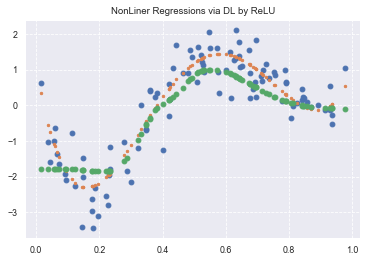

In [16]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [17]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
